In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import allel
import seaborn as sns
import allel

In [2]:
## the first thing is i need to filter out the vcf file
## to only keep the samples that are not  grenent 

In [3]:
# awk '{print $1, $1}' training_accessions.txt > modified_training_accessions.txt


In [4]:
## modify the fam fro the ld prune to get the kinship matrix 

In [5]:
climate_file = '/carnegie/nobackup/scratch/xwu/grenet/metadata/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv'
climate = pd.read_csv(climate_file, usecols = ['ecotypeid', 'bio1'])

FileNotFoundError: [Errno 2] No such file or directory: '/carnegie/nobackup/scratch/xwu/grenet/metadata/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv'

In [ ]:
fam_ldp = pd.read_csv('nogrenenet_1001genomes_LDpruned.fam',header=None, sep = ' ')

fam_ldp = fam_ldp.merge(climate, left_on = 0,right_on = 'ecotypeid').drop([5, 'ecotypeid'],axis=1)

## standaraize bio1 
#fambio1_mean = fam_ldp['bio1'].mean()
#fambio1_std = fam_ldp['bio1'].std()

#fam_ldp['bio1'] = (fam_ldp['bio1'] - fambio1_mean) / fambio1_std



In [7]:
#fam_ldp.to_csv('nogrenenet_1001genomes_LDpruned.fam',header=None, index=None, sep = ' ')

In [8]:
fam_ldp = pd.read_csv('nogrenenet_1001g_grenet_climate.fam',header=None, sep = ' ')

fam_ldp = fam_ldp.merge(climate, left_on = 0,right_on = 'ecotypeid').drop([5, 'ecotypeid'],axis=1)

## standaraize bio1 
#fambio1_mean = fam_ldp['bio1'].mean()
#fambio1_std = fam_ldp['bio1'].std()

#fam_ldp['bio1'] = (fam_ldp['bio1'] - fambio1_mean) / fambio1_std

#fam_ldp.to_csv('nogrenenet_1001g_grenet_climate.fam',header=None, index=None, sep = ' ')

In [9]:
### ## rename columns so they are recognizable by plink clumping

In [10]:
path = 'scratch/gea_grene-net/idea_fromind_to_pop/1001g/1001_gtrainnongrenet/output/phenobio1nogrenenet_1001g_grenet_climatew20cov.assoc.assoc.txt'

In [11]:
assoc = pd.read_csv('output/phenobio1nogrenenet_1001g_grenet_climatew20cov.assoc.assoc.txt', sep = '\t')

In [12]:
fam = pd.read_csv('../1001g_grenet_climate.fam', header=None, sep = ' ')#.drop(5,axis=1)

In [13]:
fam

,0,1,2,3,4,5
0,10001,10001,0,0,0,9.166667
1,10002,10002,0,0,0,-9.000000
2,10004,10004,0,0,0,10.358334
3,10005,10005,0,0,0,9.866667
4,10006,10006,0,0,0,-9.000000
...,...,...,...,...,...,...
1132,100002,100002,0,0,0,-9.000000
1133,6939,6939,0,0,0,-9.000000
1134,9940,9940,0,0,0,-9.000000
1135,9977,9977,0,0,0,-9.000000


In [14]:
pred = pd.read_csv('output/pheno_pred_bslmm.prdt.txt',header=None)

In [15]:
fam_pred = pd.concat([fam, pred],axis=1)

In [16]:
climate

,ecotypeid,bio1
0,159,9.325000
1,265,12.962500
2,763,-2.995833
3,765,-2.487500
4,766,-4.283333
...,...,...
1866,9482,7.212500
1867,9490,8.733334
1868,9496,8.662500
1869,9499,8.270833


In [17]:
fam_pred = fam_pred.iloc[:, [0, 5, 6]]

In [18]:
fam_pred.columns = ['ecotypeid', 'input_cl', 'predicted_cl']

In [19]:
fam_pred = fam_pred.merge(climate)

In [20]:
fam_pred.dropna()

,ecotypeid,input_cl,predicted_cl,bio1
1,10002,-9.0,9.57129,8.879167
4,10006,-9.0,11.20620,11.320833
8,10011,-9.0,7.16472,7.704167
10,10013,-9.0,13.62110,12.433333
11,10014,-9.0,13.39480,14.062500
...,...,...,...,...
1132,100002,-9.0,11.11860,15.100000
1133,6939,-9.0,8.67359,18.333334
1134,9940,-9.0,12.66260,13.279166
1135,9977,-9.0,9.90397,8.716667


<Axes: xlabel='bio1', ylabel='predicted_cl'>

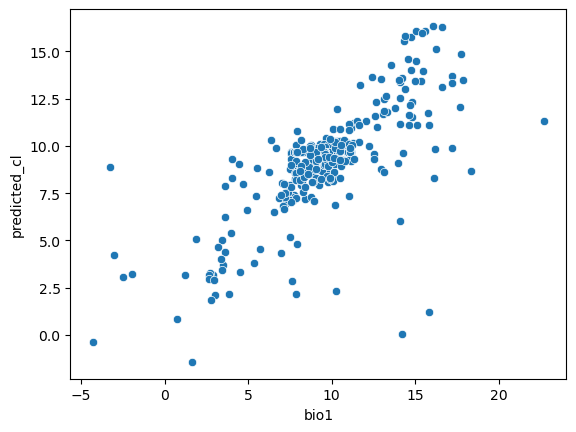

In [21]:
sns.scatterplot(data = fam_pred.dropna(), x='bio1', y = 'predicted_cl')

In [24]:
#r2_score(fam_pred['bio1'], fam_pred['predicted_cl'])

In [ ]:
r2_score(fam_pred['bio1'], fam_pred['prs_x'])

In [25]:
xr = pd.read_csv('predicted_climate_grenet_accession.txt', sep = '\t',header=None)
xr = xr[[0,1]]

xr.columns = ['ecotypeid', 'prs_x']

In [26]:
fam_pred = fam_pred.merge(xr)

<Axes: xlabel='prs_x', ylabel='predicted_cl'>

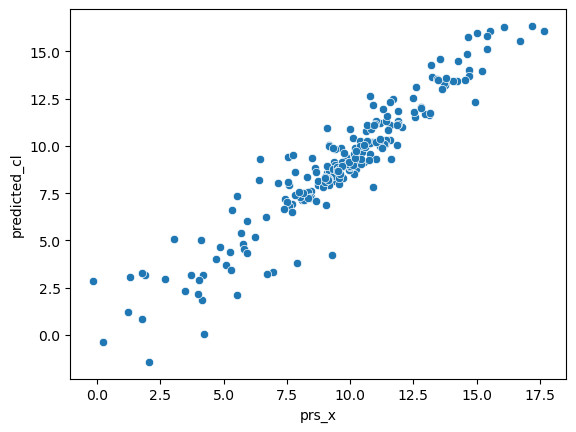

In [27]:
sns.scatterplot(data = fam_pred.dropna(), x='prs_x', y = 'predicted_cl')

In [452]:
assoc2 = pd.read_csv('output/nogrenenet_1001g_grenet_climatew20cov.assoc.txt', sep = '\t')

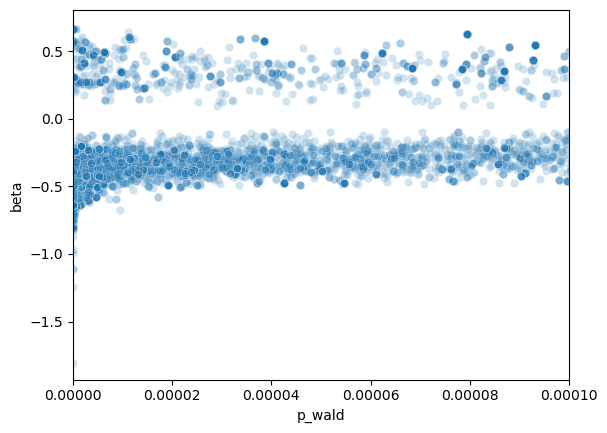

In [453]:
sns.scatterplot(x = assoc2['p_wald'], y = assoc2['beta'],alpha = 0.2)
# Set the limits for the x-axis
plt.xlim(0, 0.0001)

# Show the plot
plt.show()

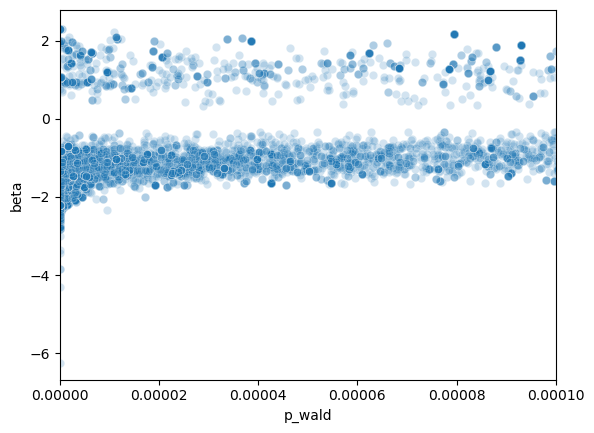

In [71]:
sns.scatterplot(x = assoc['p_wald'], y = assoc['beta'],alpha = 0.2)
# Set the limits for the x-axis
plt.xlim(0, 0.0001)

# Show the plot
plt.show()

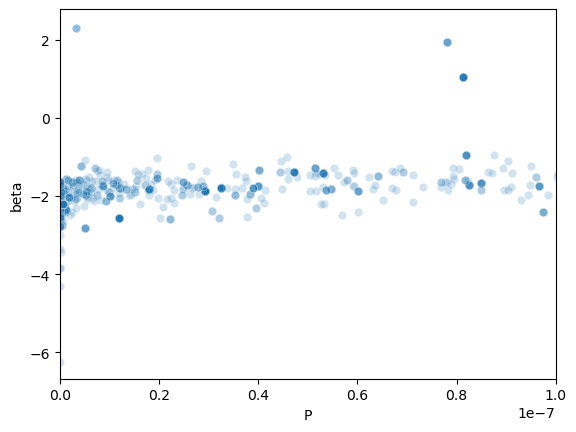

In [80]:
sns.scatterplot(x = assoc['P'], y = assoc['beta'],alpha = 0.2)
# Set the limits for the x-axis
plt.xlim(0, 0.0000001)

# Show the plot
plt.show()

In [68]:
assoc_sel = assoc[assoc['p_wald'] <= (0.05/len(assoc))]

<Axes: xlabel='beta', ylabel='Count'>

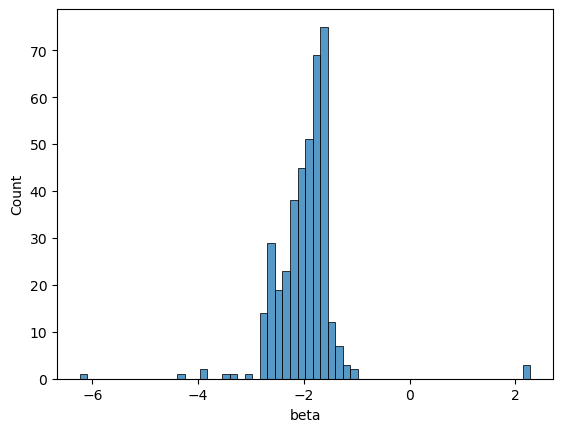

In [69]:
sns.histplot(assoc_sel['beta'])

In [18]:
#assoc_sel2 = assoc2[assoc2['p_wald'] < (0.05/len(assoc2))]

In [22]:
(assoc_sel2['beta'] == assoc_sel['beta']).all()

False

In [297]:
assoc = assoc.rename(columns={'rs': 'SNP', 'p_wald': 'P'})

In [298]:
## there is a difference in the number of 
## passsed vs analysed snps based on Missing phenotypes/genotypes and/or low AF.

In [299]:
assoc_sel = assoc[assoc['P'] < (0.05/len(assoc))]

In [300]:
0.05/len(assoc)

2.1675517502980386e-08

In [301]:
assoc_sel

,chr,SNP,ps,n_miss,allele1,allele0,af,beta,se,logl_H1,l_remle,P
21273,1,1_1480367,1480367,0,T,G,0.011,-1.683461,0.291506,-1458.230,2.298798,1.120718e-08
24753,1,1_1706628,1706628,0,A,G,0.011,-2.438702,0.384490,-1455.235,2.094135,3.870943e-10
25366,1,1_1737504,1737504,0,A,T,0.017,-2.047501,0.360830,-1458.749,2.242337,1.978255e-08
29724,1,1_2056153,2056153,0,T,A,0.011,-1.976460,0.338247,-1458.360,2.017321,7.588363e-09
29782,1,1_2060690,2060690,0,G,A,0.011,-1.976460,0.338247,-1458.360,2.017321,7.588363e-09
...,...,...,...,...,...,...,...,...,...,...,...,...
2261794,5,5_24257224,24257224,0,C,A,0.011,-2.207472,0.352976,-1455.739,2.059228,6.672227e-10
2261878,5,5_24266780,24266780,0,T,C,0.011,-2.207472,0.352976,-1455.739,2.059228,6.672227e-10
2261936,5,5_24271697,24271697,0,G,T,0.011,-2.207472,0.352976,-1455.739,2.059228,6.672227e-10
2262202,5,5_24283153,24283153,0,G,C,0.011,-2.207472,0.352976,-1455.739,2.059228,6.672227e-10


In [27]:
# Output file path
output = 'phenobio1nogrenenetinput_clump.txt'

# Writing to the file
with open(output, 'w') as file:
    # Write the header
    file.write("SNP P\n")
    # Iterate through each row in the DataFrame
    for index, row in assoc[['SNP', 'P']].iterrows():
        file.write(f"{row['SNP']} {row['P']}\n")

In [ ]:
# Run PLINK clumping
plink \
--bfile nogrenenet_1001g_grenet_climate \
--clump phenobio1nogrenenetinput_clump.txt \
--clump-p1 2e-08 \
--clump-r2 0.2 \
--out phenobio1clump02

In [529]:
clump = pd.read_csv('phenobio1clump08.clumped',sep='\s+')

In [530]:
clump = clump.merge(assoc[['SNP', 'beta']], on = 'SNP')[['SNP', 'beta']]

In [ ]:
#genotype_counts = pd.read_csv('../../../leave_1_out/genotype_counts_fullgenome231ecotypes.csv').drop('Unnamed: 0', axis=1)

In [ ]:
## get teh vcf file so i can get the variants id and get and index 
#vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1.recode.vcf'
#vcf = allel.read_vcf(vcf_file)

In [542]:
vcf_file = 'nogrenenet_1001g_grenet_climate.vcf'
vcf = allel.read_vcf(vcf_file)

In [955]:
len(vcf['variants/ID'])

3235480

In [543]:
genotype_counts = vcf['calldata/GT'].sum(axis=2)

In [544]:
#genotype_counts_st = (genotype_counts - np.mean(genotype_counts)) / np.std(genotype_counts)

In [548]:
genotype_counts = pd.DataFrame(genotype_counts)

In [585]:
pd.Series(vcf['samples']).str.split('_').str[0]

0      10001
1      10004
2      10005
3      10008
4      10009
       ...  
778     9995
779     9996
780     9997
781     9998
782     9999
Length: 783, dtype: object

In [586]:
genotype_counts.columns = pd.Series(vcf['samples']).str.split('_').str[0]

In [921]:
#genotype_counts= genotype_counts_safe.copy()

In [922]:
# Calculate the mean of each SNP across all individuals
#means = genotype_counts.mean(axis=1)

# Ensure means is correctly shaped for broadcasting
#means_reshaped = np.array(means).reshape(-1, 1)

#genotype_counts = genotype_counts - means_reshaped

In [923]:
#clump = assoc_sel[['SNP', 'beta']]

In [924]:
## get the index 
sel_snps = clump.merge(pd.Series(vcf['variants/ID']).reset_index(), right_on = 0, left_on = 'SNP')

sel_snps = sel_snps.sort_values('index')

In [ ]:
covs = pd.read_csv('20covnogrenenet1001g_grenet_climate.recode',sep = ' ',header=None)

#covs = covs.drop(0,axis=1)

cov_beta = [8.88016, 65.431,-24.5704,  -8.7281,  -33.2247,  1.20826,  0.262903,  -15.185,  1.24654,  3.31162,  -6.31939,  10.1578,  -10.218,  -3.37916,  15.8676,  -6.36962,  1.74154 , -1.07265,  -0.881503,  0.702847,  4.68869]
## se(beta) =   0.0403971  6.66826  6.10157  5.74292  5.24799  5.23947  4.77792  4.60249  4.18844  4.10591  3.86234  3.75071  3.59846  3.4248  3.36323  3.26305  3.27009  3.24174  3.18943  3.18539  3.0179

cov_beta = np.array(cov_beta)

covs = covs.multiply(cov_beta)

covs = covs.sum(axis=1)

covsm = covs.reset_index().set_index(pd.Series(vcf['samples']).str.split('_').str[0]).reset_index()


In [933]:
test =covsm.merge(climate,right_on='ecotypeid',left_on = 'level_0')

<Axes: xlabel='bio1', ylabel='0'>

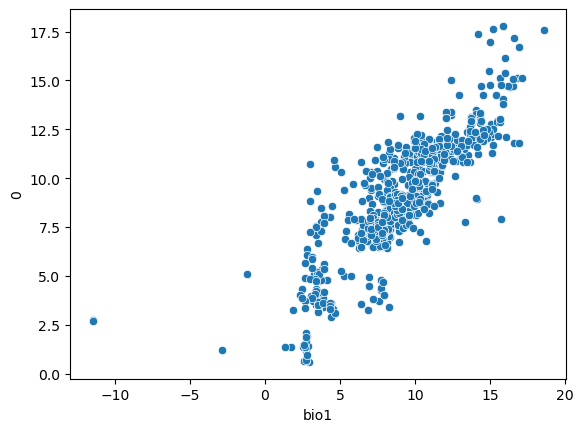

In [935]:
sns.scatterplot(test, x = 'bio1', y =  0)

In [936]:
genotype_counts_sel = genotype_counts.loc[sel_snps['index'],:]

In [937]:
# Calculate the mean of each SNP across all individuals
#means = genotype_counts_sel.mean(axis=1)

# Ensure means is correctly shaped for broadcasting
#means_reshaped = np.array(means).reshape(-1, 1)

#genotype_counts_sel = genotype_counts_sel - means_reshaped

In [ ]:
prs = genotype_counts_sel.T.multiply(sel_snps.set_index('index')['beta'])

#covs = covs.reset_index().set_index(pd.Series(vcf['samples']).str.split('_').str[0]).drop('index',axis=1)

prs = prs.sum(axis=1)/169

prs = prs.reset_index()

prs['prs'] = prs[0] + covs

<Axes: xlabel='prs', ylabel='Count'>

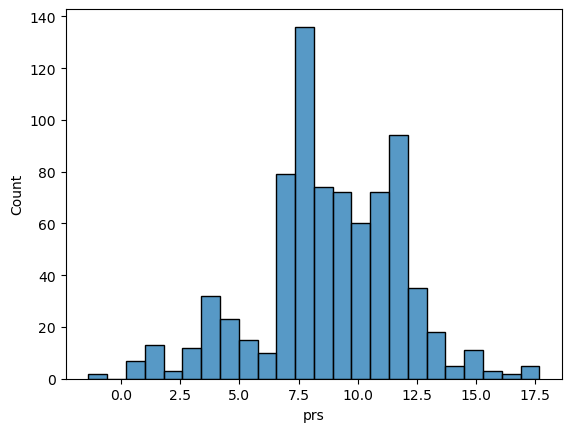

In [946]:
sns.histplot(prs['prs'])

In [947]:
prs = prs.reset_index()

In [948]:
climate['ecotypeid'] = climate['ecotypeid'].astype(str)

In [949]:
prs = prs.merge(climate, right_on = 'ecotypeid', left_on = 'index')

<Axes: xlabel='bio1', ylabel='prs'>

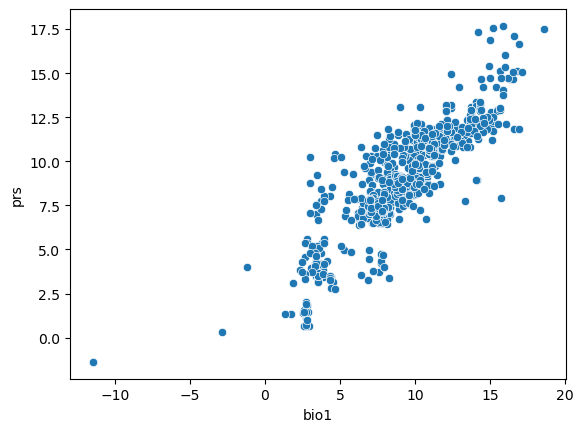

In [950]:
sns.scatterplot(prs, x = 'bio1', y =  'prs' )

<Axes: xlabel='0', ylabel='Count'>

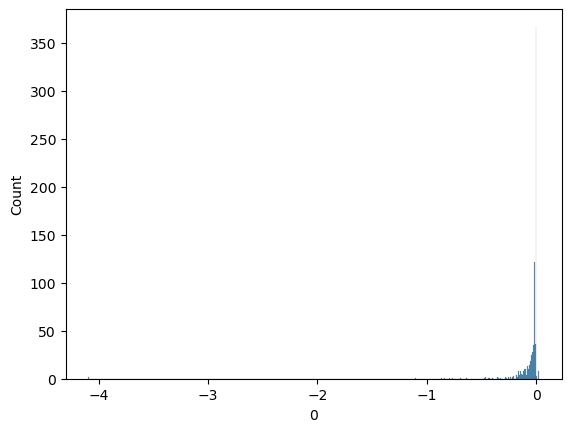

In [892]:
sns.histplot(prs[0])

In [753]:
prs

,level_0,index,0,prs,ecotypeid,bio1
0,0,10001,-1.697633,7.424223,10001,9.166667
1,1,10004,-4.262146,4.859710,10004,10.358334
2,2,10005,-3.311238,5.810618,10005,9.866667
3,3,10008,-35.279620,-26.157764,10008,2.700000
4,4,10009,-35.279620,-26.157764,10009,2.700000
...,...,...,...,...,...,...
778,778,9995,0.000000,9.121856,9995,7.795834
779,779,9996,0.000000,9.121856,9996,8.287500
780,780,9997,0.000000,9.121856,9997,8.887500
781,781,9998,-3.812180,5.309676,9998,8.216666


In [754]:
climate.dtypes

ecotypeid     object
bio1         float64
dtype: object

In [755]:
prs['index'] = prs['index'].astype(int)

In [658]:
prs = prs.drop('ecotypeid',axis=1)

In [659]:
prs

,index,0,bio1
0,10001,7.182527,9.166667
1,10004,4.618014,10.358334
2,10005,5.568922,9.866667
3,10008,-26.399460,2.700000
4,10009,-26.399460,2.700000
...,...,...,...
778,9995,8.880160,7.795834
779,9996,8.880160,8.287500
780,9997,8.880160,8.887500
781,9998,5.067980,8.216666


In [660]:
prs.columns = ['ecotype', 'prs', 'bio1']

<Axes: xlabel='bio1', ylabel='prs'>

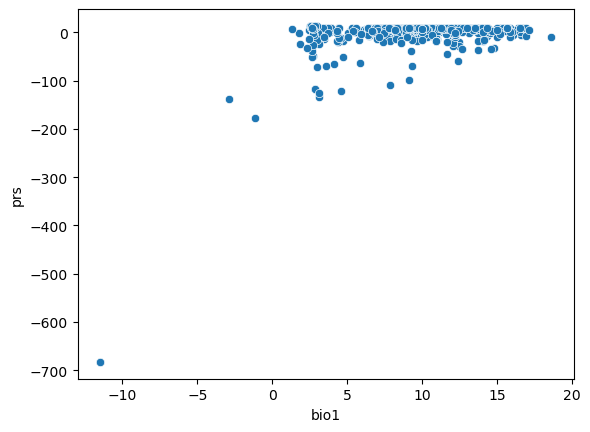

In [661]:
sns.scatterplot(prs, x = 'bio1', y =  'prs' )

In [ ]:
xr = pd.read_csv('predicted_climate_grenet_accession.txt', sep = '\t',header=None)



xr = xr[[0,1]]

xr.columns = ['ecotype', 'prs_x']

In [324]:
#prs['prs'] = (prs['prs'] * fambio1_std) + fambio1_mean

In [325]:
comp = xr.merge(prs)

In [326]:
comp

,ecotype,prs_x,prs,bio1
0,10002,10.139724,34.520531,8.879167
1,10006,11.175098,15.346149,11.320833
2,10011,8.112526,35.863237,7.704167
3,10013,13.249513,-52.692251,12.433333
4,10014,13.799263,23.526799,14.062500
...,...,...,...,...
226,100002,10.923863,-39.589501,15.100000
227,6939,9.504080,30.872779,18.333334
228,9940,10.795699,34.520531,13.279166
229,9977,9.321516,34.520531,8.716667


<Axes: xlabel='prs_x', ylabel='prs'>

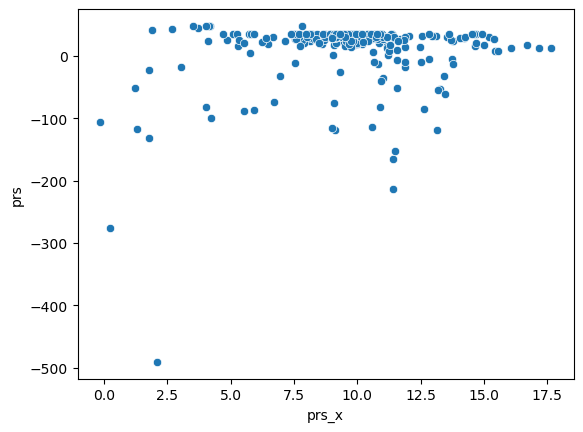

In [327]:
sns.scatterplot(comp , x = 'prs_x', y =  'prs' )

<Axes: xlabel='bio1', ylabel='prs'>

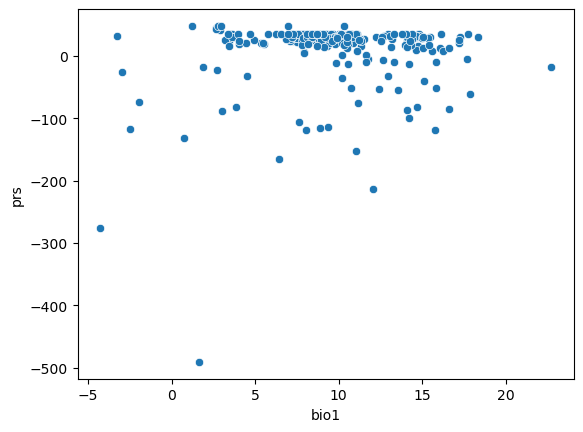

In [328]:
sns.scatterplot(comp , x = 'bio1', y =  'prs' )

<Axes: xlabel='bio1', ylabel='prs_x'>

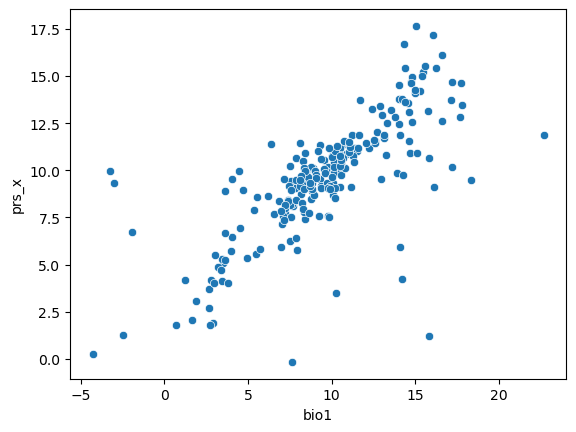

In [329]:
sns.scatterplot(comp , x = 'bio1', y =  'prs_x' )

In [ ]:
### check r2 of prs

In [19]:
climate_file = '/carnegie/nobackup/scratch/xwu/grenet/metadata/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv'
climate = pd.read_csv(climate_file, usecols = ['ecotypeid', 'bio1'])

In [25]:
climate['ecotypeid'] = climate['ecotypeid'].astype(str)

In [27]:
climate_grenenet = climate[climate['ecotypeid'].isin(vcf['samples'])]

In [28]:
climate_grenenet['bio1'] = (climate_grenenet['bio1'] - fambio1_mean) / fambio1_std

/tmp/ipykernel_4009613/1226029804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_grenenet['bio1'] = (climate_grenenet['bio1'] - fambio1_mean) / fambio1_std


In [40]:
pd.concat([prs,climate_grenenet['bio1']],axis=1)

,0,bio1
0,0.000000,NaN
1,-2.953726,NaN
2,-2.256068,NaN
3,-5.001387,NaN
4,-3.176755,NaN
...,...,...
226,NaN,-0.047244
227,NaN,0.291081
228,NaN,2.007988
229,NaN,1.797288


In [45]:
prs.index = prs.index.astype(int)

<Axes: ylabel='Count'>

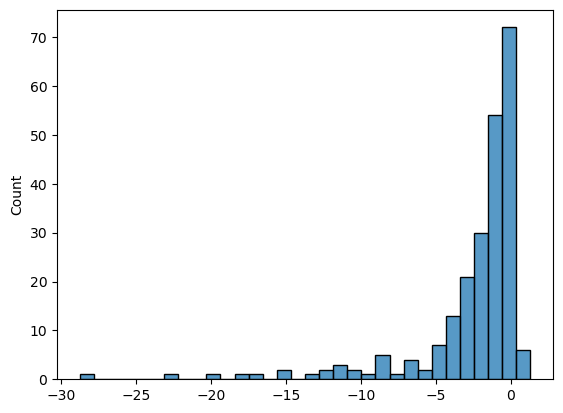

In [49]:
sns.histplot(prs)

In [42]:
climate_grenenet['bio1'].index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230],
      dtype='int64', length=231)

In [32]:
r2_score(prs, climate_grenenet['bio1'])

-0.5010956556476502

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming climate_grenenet['bio1'] and prs are your variables
X = climate_grenenet['bio1'].values.reshape(-1, 1)  # Predictor
y = prs  # Response

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
predictions = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, predictions)
print(f'R^2 score: {r2}')


R^2 score: 0.0006748310411117675


<Axes: xlabel='bio1'>

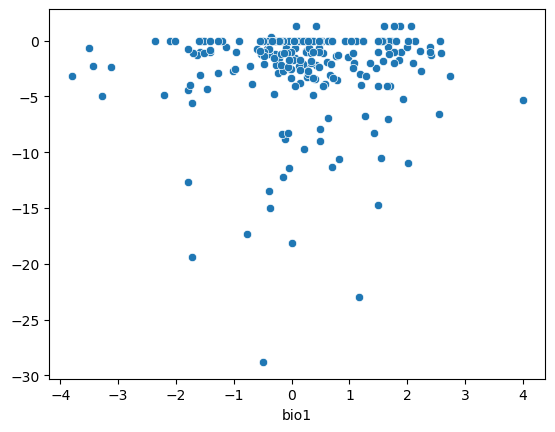

In [46]:
sns.scatterplot(x = climate_grenenet['bio1'], y= prs)

In [30]:
prs

0       0.000000
1      -2.953726
2      -2.256068
3      -5.001387
4      -3.176755
         ...    
226   -11.416259
227     0.000000
228     0.000000
229     0.000000
230    -3.158896
Length: 231, dtype: float64

In [ ]:
## get teh ecotypes names 
prs.index = vcf['samples']

prs = prs.reset_index()

prs.columns = ['ecotype', 'prs']

In [43]:
sites_climate = pd.read_csv('../../../../grene/data/worldclim_sitesdata.csv')[['site', 'bio1']]

sites_climate['bio1'] = (sites_climate['bio1'] - fambio1_mean) / fambio1_std

In [98]:
go = {}
for site in sites_climate['site']:
    for ecotype in prs['ecotype']:
        bio1 = sites_climate[sites_climate['site'] == site]['bio1'].values[0]
        prs_value = prs[prs['ecotype'] == ecotype]['prs'].values[0]
        go_value = bio1 - prs_value
        go[str(site) + '_' + ecotype] = [site, ecotype, go_value]

In [ ]:
go = pd.DataFrame(go).T.reset_index(drop=True)

go.columns = ['site', 'ecotype', 'go']

In [184]:
path_ecotypes = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_ecotype_frequency.txt'

ecotypes_names = pd.read_csv('/carnegie/nobackup/scratch/xwu/grenet/ecotypes_names.txt',header=None)[0].to_list()

final_gen = pd.read_csv('../../../final_gen.csv')['sample_name'].to_list()

real_ef = pd.read_csv(path_ecotypes, sep = '\t',usecols = final_gen)

In [185]:
fc = pd.read_csv('../../../../grene/data/merged_samples_data.csv')[['sample_name', 'total_flower_counts']]

In [186]:
for i in real_ef.columns:
    fl = fc[fc['sample_name'] == i]['total_flower_counts'].values[0]
    real_ef[i] = real_ef[i] * fl

In [187]:
real_ef = pd.DataFrame(real_ef)

real_ef.columns = final_gen

real_ef.index = ecotypes_names

real_ef = real_ef.sort_index()

In [188]:
real_ef = real_ef.reset_index()

real_ef = pd.melt(real_ef, id_vars=['index'], var_name='ColumnName', value_name='Value')

real_ef.columns = ['ecotype', 'sample', 'freq' ]

real_ef['site'] = real_ef['sample'].str.split('_').str[0]
real_ef['plot'] = real_ef['sample'].str.split('_').str[2]

In [190]:
#real_ef = real_ef.groupby(['site', 'ecotype'])['freq'].median().reset_index()

In [191]:
real_ef

,ecotype,sample,freq,site,plot
0,159,1_2_2,0.777560,1,2
1,265,1_2_2,5.755712,1,2
2,763,1_2_2,0.036504,1,2
3,765,1_2_2,0.027980,1,2
4,766,1_2_2,0.030491,1,2
...,...,...,...,...,...
82000,10011,60_1_12,0.003180,60,12
82001,10013,60_1_12,0.004410,60,12
82002,10014,60_1_12,0.004030,60,12
82003,100001,60_1_12,0.009840,60,12


In [192]:
sites_u = real_ef.columns.str.split('_').str[0].unique()

In [193]:
go.dtypes

site       object
ecotype    object
go         object
dtype: object

In [194]:
real_ef['ecotype'] = real_ef['ecotype'].astype(str)
go['site'] = go['site'].astype(str)

In [195]:
real_ef['site'].unique()

array(['1', '2', '4', '5', '6', '9', '10', '11', '12', '13', '23', '24',
       '25', '26', '27', '28', '32', '33', '37', '42', '43', '45', '46',
       '48', '49', '52', '53', '54', '55', '57', '60'], dtype=object)

In [196]:
go_freq = real_ef.merge(go, on =['site', 'ecotype'])

In [164]:
correlations = {}
for sample in go_freq['sample'].unique():
    sample1 = go_freq[go_freq['sample'] == sample]
    X_ranked = sample1['freq']
    y_ranked = abs(sample1['go'])
    correlation, _ = spearmanr(X_ranked, y_ranked)
    correlations[sample] = [correlation]

In [ ]:
sp_corr = pd.DataFrame(correlations).T.reset_index()

sp_corr.columns = ['sample', 'sp_corr']

sp_corr['site'] = sp_corr['sample'].str.split('_').str[0]

In [175]:
sp_corr['sp_corr_c'] = sp_corr['sp_corr'] * -1

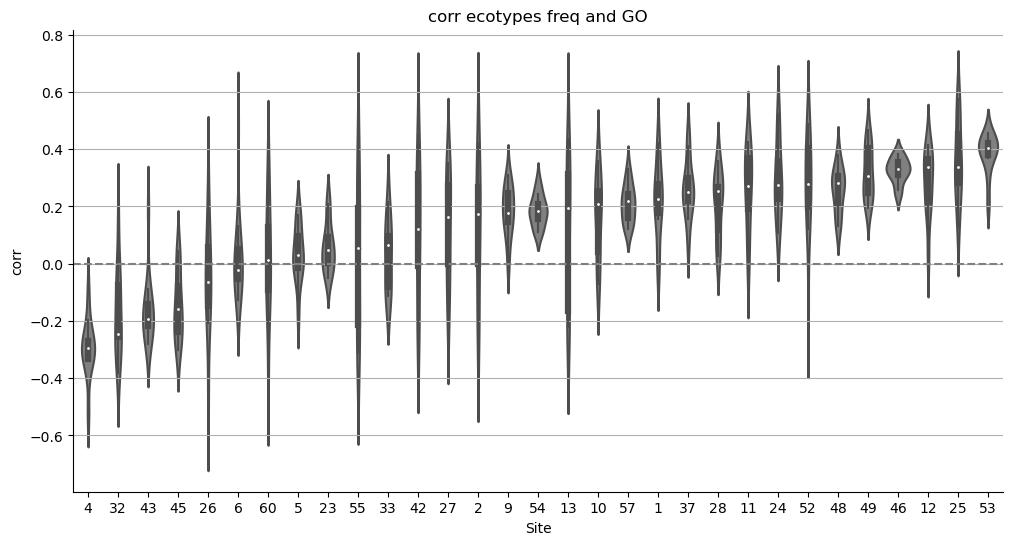

In [176]:
medians = sp_corr.groupby('site')['sp_corr_c'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=sp_corr, y='sp_corr_c', x='site', order=medians.index, color='Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

# Optionally, add labels or a title
plt.title('corr ecotypes freq and GO')
plt.xlabel('Site')
plt.ylabel('corr')
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
# Show the plot
plt.show()

In [231]:
corr_climate = pd.read_csv('../../../climate_distance/cp_corr_climate.csv').drop('Unnamed: 0',axis=1)[['id', 'corr_c']]

In [232]:
corr_climate.columns = ['sample', 'climate_c']

In [ ]:
all = sp_corr.merge(corr_climate)

all = all.drop('sp_corr',axis=1)

all = all.melt(id_vars=['sample', 'site'])

all.columns = ['sample', 'site', 'type', 'corr']

In [259]:
all.to_csv('corr_700againstclimate.csv')

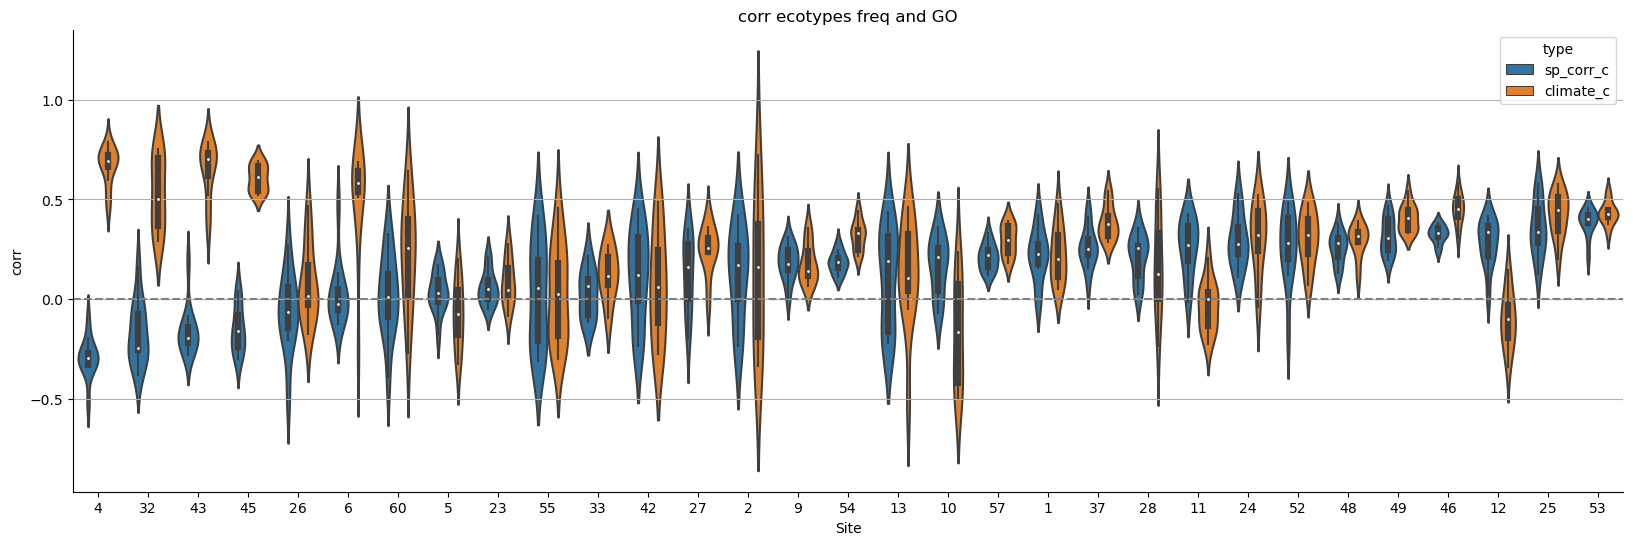

In [258]:

medians = all[all['type'] == 'sp_corr_c'].groupby(['site'])['corr'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(20, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all, y='corr', x='site', hue = 'type' ,order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

# Optionally, add labels or a title
plt.title('corr ecotypes freq and GO')
plt.xlabel('Site')
plt.ylabel('corr')
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
# Show the plot
plt.show()

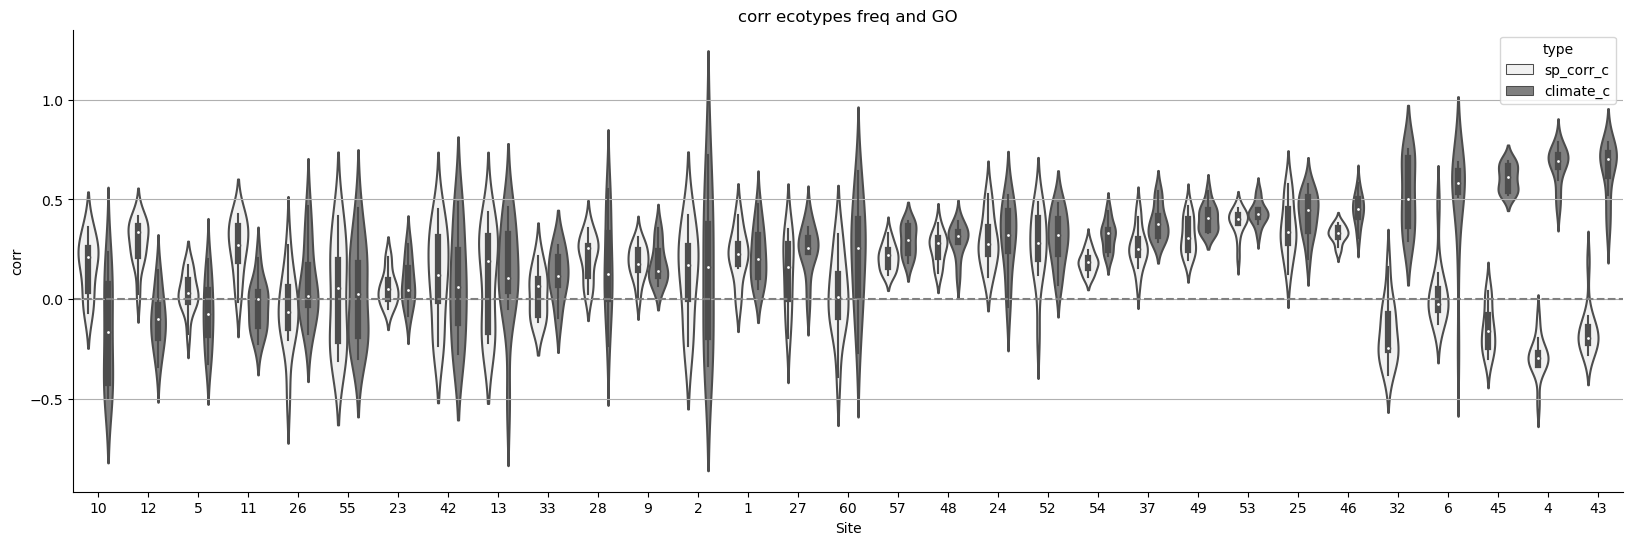

In [250]:
medians = all[all['type'] == 'climate_c'].groupby(['site'])['corr'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(20, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all, y='corr', x='site', hue = 'type' ,order=medians.index, color='Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

# Optionally, add labels or a title
plt.title('corr ecotypes freq and GO')
plt.xlabel('Site')
plt.ylabel('corr')
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
# Show the plot
plt.show()

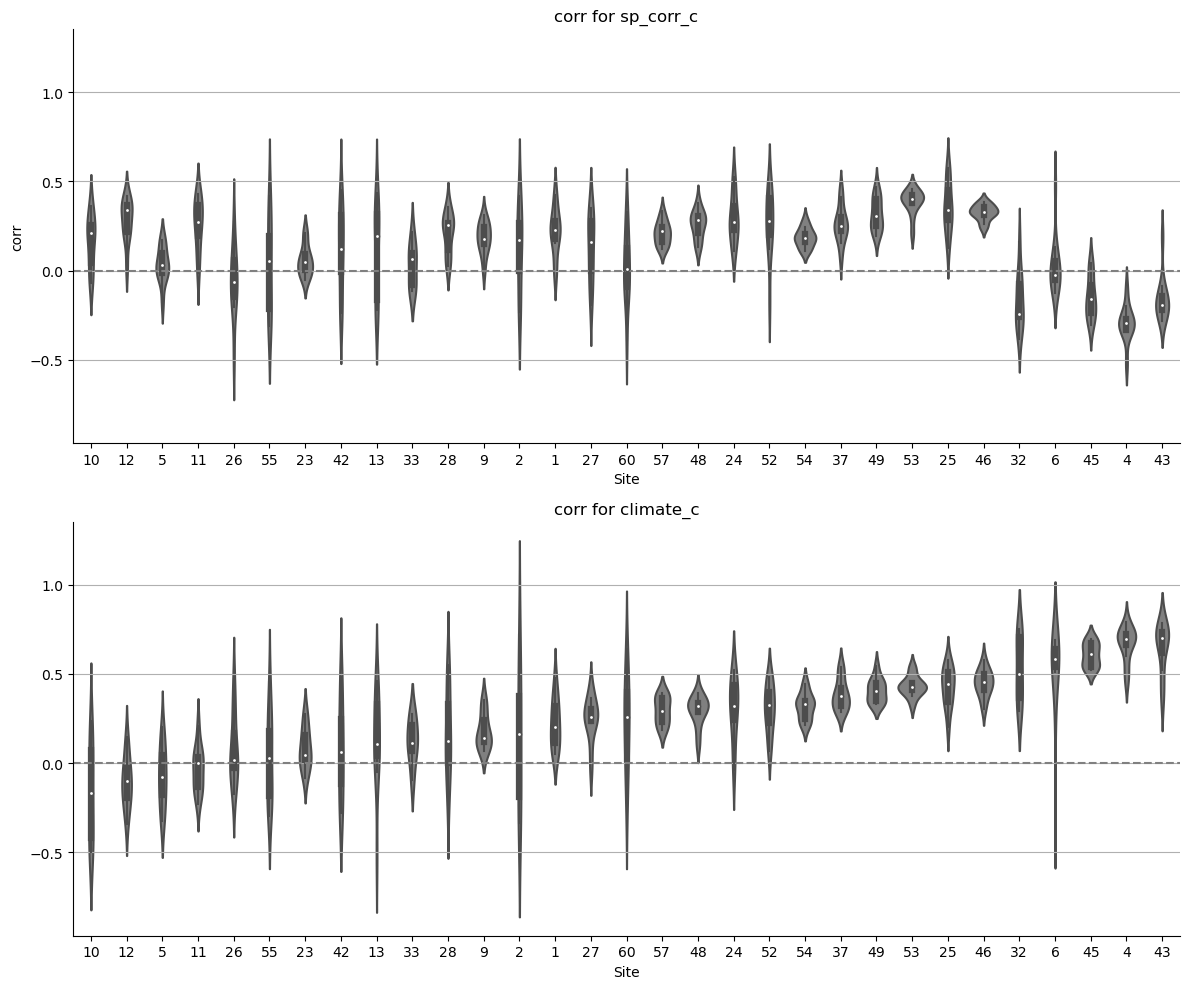

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'all' is your DataFrame and it includes 'site', 'corr', and 'type' columns
medians = all[all['type'] == 'climate_c'].groupby(['site'])['corr'].median().sort_values()

# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharey=True)  # sharey allows for shared y-axis limits

# Loop over each type and plot in a separate subplot
types = all['type'].unique()
for i, t in enumerate(types):
    # Filter data for the type
    data = all[all['type'] == t]
    # Plot on the i-th axis
    sns.violinplot(data=data, y='corr', x='site', order=medians.index, color='grey', ax=axes[i])
    axes[i].set_title(f'corr for {t}')
    axes[i].axhline(0, color='grey', linestyle='--')
    axes[i].grid(axis='y')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('Site')
    axes[i].set_ylabel('corr' if i == 0 else '')  # Only label y-axis on the first subplot

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


In [255]:
all

,sample,site,type,corr
0,1_2_2,1,sp_corr_c,0.421962
1,1_2_3,1,sp_corr_c,0.401378
2,1_3_1,1,sp_corr_c,0.269865
3,1_3_4,1,sp_corr_c,0.256984
4,1_3_5,1,sp_corr_c,0.235184
...,...,...,...,...
705,60_1_8,60,climate_c,0.258127
706,60_1_9,60,climate_c,0.030648
707,60_1_10,60,climate_c,0.255345
708,60_1_11,60,climate_c,0.640617


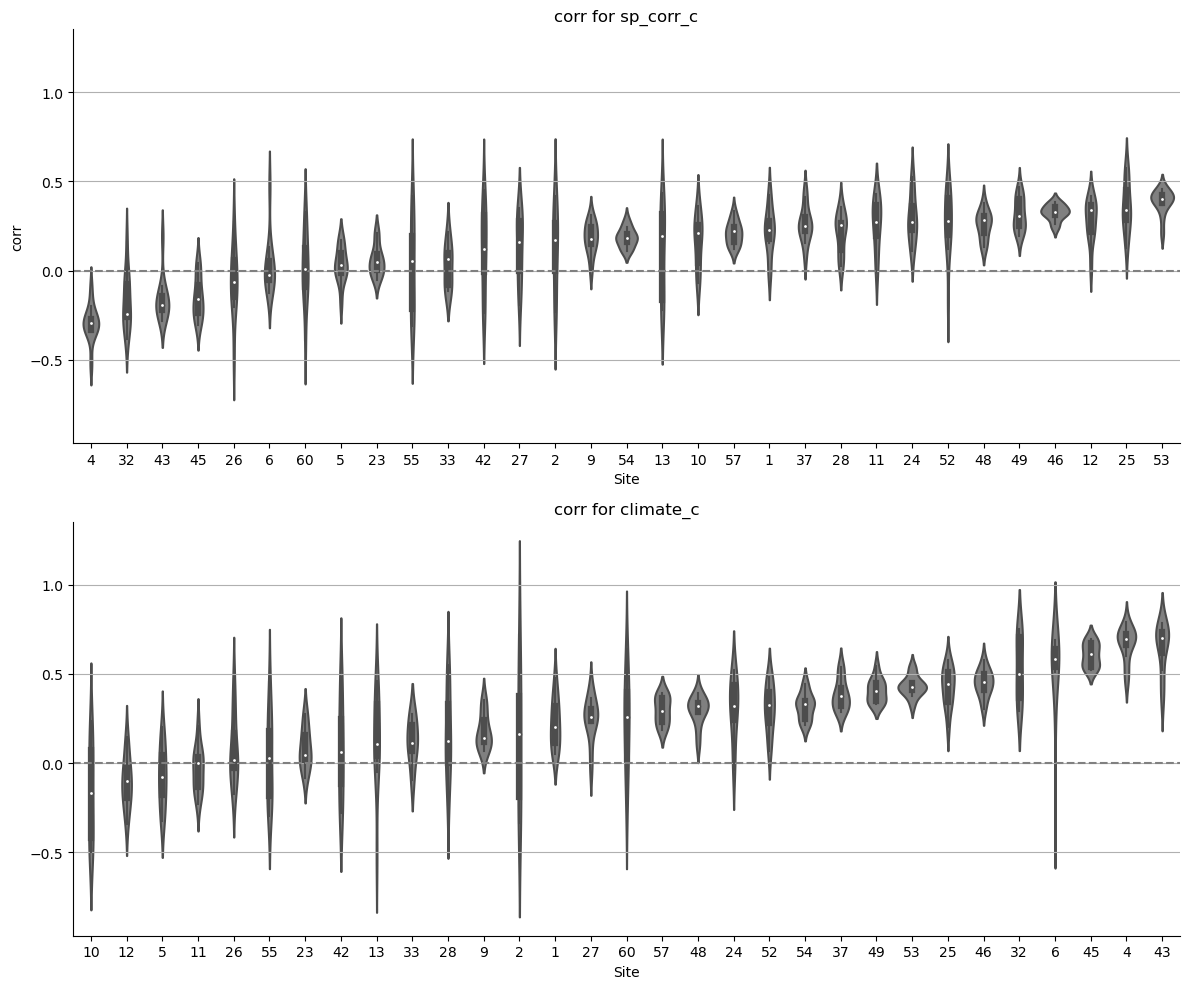

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'all' is your DataFrame and it includes 'site', 'corr', and 'type' columns
medians_cl = all[all['type'] == 'climate_c'].groupby(['site'])['corr'].median().sort_values()
medians_sp = all[all['type'] == 'sp_corr_c'].groupby(['site'])['corr'].median().sort_values()

# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharey=True)  # sharey allows for shared y-axis limits

# Loop over each type and plot in a separate subplot
types = all['type'].unique()
for i, t in enumerate(types):
    # Filter data for the type
    data = all[all['type'] == t]
    # Plot on the i-th axis
    if t == 'climate_c':
        order_sel = medians_cl.index
    elif t == 'sp_corr_c':
        order_sel = medians_sp.index
        
    sns.violinplot(data=data, y='corr', x='site', order=order_sel, color='grey', ax=axes[i])
    axes[i].set_title(f'corr for {t}')
    axes[i].axhline(0, color='grey', linestyle='--')
    axes[i].grid(axis='y')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('Site')
    axes[i].set_ylabel('corr' if i == 0 else '')  # Only label y-axis on the first subplot

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

In [197]:
go_freq['ecotype'].unique()

array(['159', '265', '763', '765', '766', '768', '772', '5151', '5165',
       '5768', '5772', '5784', '5811', '6013', '6025', '6040', '6073',
       '6074', '6108', '6150', '6177', '6180', '6184', '6188', '6195',
       '6209', '6216', '6243', '6244', '6898', '6911', '6915', '6929',
       '6932', '6938', '6939', '6940', '6945', '6958', '6961', '6963',
       '6979', '6987', '7000', '7002', '7003', '7008', '7013', '7025',
       '7028', '7031', '7036', '7062', '7063', '7067', '7071', '7077',
       '7092', '7103', '7106', '7125', '7126', '7127', '7143', '7164',
       '7165', '7186', '7203', '7209', '7217', '7218', '7244', '7255',
       '7268', '7273', '7276', '7282', '7287', '7288', '7296', '7298',
       '7316', '7323', '7333', '7346', '7347', '7353', '7372', '7378',
       '7384', '7394', '7404', '7411', '7521', '8214', '8230', '8231',
       '8240', '8247', '8249', '8311', '8312', '8351', '8354', '8357',
       '8376', '8387', '9057', '9058', '9323', '9371', '9394', '9416',
     

In [213]:
correlations_ecotype = {}
for ecotype in go_freq['ecotype'].unique():
    ecotype1 = go_freq[go_freq['ecotype']==ecotype]
    ecotype1 = ecotype1.groupby('site')[['freq', 'go']].median().reset_index().sort_values('freq')
    X_ranked = ecotype1['freq']
    y_ranked = abs(ecotype1['go'])
    correlation, _ = spearmanr(X_ranked, y_ranked)
    correlations_ecotype[ecotype] = [correlation]

In [218]:
correlations_ecotype = pd.DataFrame(correlations_ecotype).T.reset_index()

In [222]:
correlations_ecotype[0] = correlations_ecotype[0] * -1

In [225]:
correlations_ecotype = correlations_ecotype.sort_values(0)

<Axes: xlabel='index', ylabel='0'>

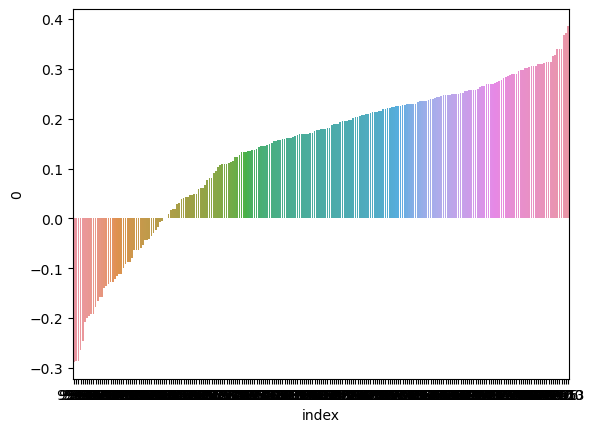

In [226]:
sns.barplot(correlations_ecotype, x = 'index', y = 0)